Extensive Look at NBA injuries from 2010 to 2018:
* Exploration of the dataset, understanding the variables.
* Which teams had more injuries in the past 7 seasons?
* Who are the players with more injuries during the last five seasons??
       
* Which types of injuries has a specific player sustained? 
* What are the most frequent injuries in the NBA?
    * Most frequent injuries in a team.
* What is the season with more injuries?
    * Which are the months when injuries tend to appear more?
    * The five players with more injuries during 2012.
    * Ten teams with more injured players during 2012.

In [ ]:
#Import packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.graph_objects as go

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
#read the dataset
data = pd.read_csv("/kaggle/input/nba-injuries-2010-2018/injuries_2010-2020.csv",parse_dates=[0])

print(data.info())
print(data.columns)
data.describe()
data.head(3)

There are only two rows with a NaN in variable Team, so I'm going to delete them.

In [ ]:
injuries = data[data.Team.notnull()]

What does the variable Acquired and the variable Relinquished mean? Their meaning is not very clear, specially for non-native English speakers as me. Let's look at the values that these variables get in the dataset.

In [ ]:
list(set(injuries['Acquired'].values))

In [ ]:
list(set(injuries['Relinquished'].values))

These attributes have as values the names of the players. This doesn't make anything clear. Let's watch the dataset once again.

In [ ]:
injuries.head(10)

It is safe to assume that the variable Reliquinshed means that the player that sustained the injury had to leave the game 

In [ ]:
noEmptyValuesInAcquired= injuries[injuries.Acquired.notnull()]

In [ ]:
list(set(noEmptyValuesInAcquired['Notes'].values))

In [ ]:
noEmptyValuesInRelinquished= injuries[injuries.Relinquished.notnull()]
list(set(noEmptyValuesInRelinquished['Notes'].values))

Okay, this confirms that the term Relinquished has the name of the person who gets the injury. The field Acquired is not empty when the person returns to the team or it has to leave it because he needs a major medical procedure. 

Because we are only interested in the moment when the person gets the injury, and in the type of that injury, we are going to discard the Acquired column all together to clean our dataset before diving any further.

In [ ]:
newDatasetInjuries = injuries[injuries.Relinquished.notnull()]
newDatasetInjuries=newDatasetInjuries.drop(['Acquired'],axis=1)
newDatasetInjuries.info()

In [ ]:
newDatasetInjuries.head()

Now we have the dataset we needed to make our study of the injuries. 

**1-Which teams had more injuries in the past 7 seasons?**


In [ ]:
import datetime as dt

In [ ]:
pastSevenSeasons=newDatasetInjuries[(newDatasetInjuries.Date.dt.year <= 2020) & (newDatasetInjuries.Date.dt.year >=2013)]

In [ ]:
sns.countplot(y="Team",data=pastSevenSeasons,order=pastSevenSeasons.Team.value_counts().iloc[:7].index,palette="Set2")

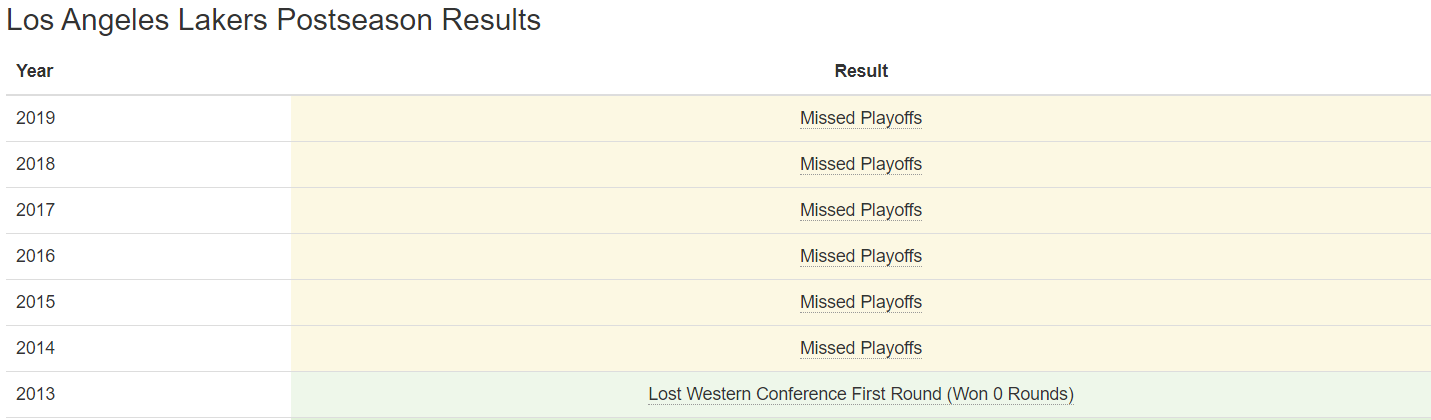
*chart used from https://champsorchumps.us/team/nba/los-angeles-lakers*

*From this data visualization, we are able to see that the Lakers has fell victim to the most injuries from years 2013 to 2020. Since 2013, the Lakers has missed every NBA playoffs since 2013

**2-Who are the players with more injuries during the last five seasons?**

In [ ]:
sns.countplot(y="Relinquished",data=pastSevenSeasons,order=pastSevenSeasons.Relinquished.value_counts().iloc[:10].index,palette="Set3")

The top 4 players during the 2013-2018 that has illustrated the most ammount of injuries is that of the Forward position. This makes sense due to the fact that their role is to be in contact more often than a guard position.

*Joel Embid - Power Foward/Center

*Anthony Davis - Power Forward/Center

*Chandler Parsons - Small Forward

*Kevin Love - Power Forward

Lets take a look at the injuries sustained by Point Guard **Chris Paul**

In [ ]:
chrisPaul=newDatasetInjuries[(newDatasetInjuries.Relinquished == "Chris Paul")]
chrisPaul.head()

List the different values that the Notes column has.

In [ ]:
list(set(chrisPaul['Notes'].values))

**4-What are the most frequent injuries in the NBA?**

For answering this question, I'm going to plot the most frequent words (excluding stopwords, etc) in the column Notes.

In [ ]:

from collections import Counter
import pandas as pd
import nltk

stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('left')
stopwords.append('right')
stopwords.append('(dnp)')
stopwords.append('(dtd)')
stopwords.append('sore')
stopwords.append('sprained')
stopwords.append('injury')
stopwords.append('strained')
stopwords.append('()')
stopwords.append('rest')
stopwords.append('surgery')
stopwords.append('indefinitely')
stopwords.append('season')
stopwords.append('bruised')
stopwords.append('torn')
stopwords.append('repair')
stopwords.append('illness')
stopwords.append('fractured')
stopwords.append('for')
stopwords.append('lower')
stopwords.append('/')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
for word in stopwords:
    stopwords.remove(word)
# replace '|'-->' ' and drop all stopwords
words = (newDatasetInjuries.Notes
           .str.lower()
            .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
         
           .split()
)

mostFrequentWordsInNotes = pd.DataFrame(Counter(words).most_common(10),
                    columns=['Word', 'Frequency']).set_index('Word')

# plot
mostFrequentWordsInNotes.plot.bar(rot=0, figsize=(10,10), width=0.8)

The most frequent injuries are the knee ones and the injuries that made the player don't play the game (dnp). Injuries in left extremities are more usual too.

-Most frequent injuries in a team. For example,the New Orleans Pelicans.

In [ ]:
from collections import Counter
import nltk

pelicans=newDatasetInjuries[(newDatasetInjuries.Team=="Pelicans")]

stopwords = nltk.corpus.stopwords.words('english')
# Regular expressions for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# drop all stopwords
words = (pelicans.Notes
           .str.lower()
           .str.cat(sep=' ')
           .split()
)


mostFrequentWordsInNotes = pd.DataFrame(Counter(words).most_common(10),
                    columns=['Word', 'Frequency']).set_index('Word')


# plot
mostFrequentWordsInNotes.plot.bar(rot=0, figsize=(10,10), width=0.8)

**5-What is the season with more injuries?** 

 I'm adding a new column 'season' to the dataset with the year extracted from the parameter Date
of each row.

In [ ]:
newDatasetInjuries['season'] = pd.DatetimeIndex(newDatasetInjuries['Date']).year
newDatasetInjuries.head()

In [ ]:
sns.countplot(y='season',data=newDatasetInjuries,palette='Set2',order=newDatasetInjuries.season.value_counts().iloc[:].index)

The season with more injured players is season 2012. And which are the months when injuries tend to appear more?

In [ ]:
newDatasetInjuries['month'] = pd.DatetimeIndex(newDatasetInjuries['Date']).month
sns.countplot(y='month',data=newDatasetInjuries,palette='Blues_d',order=newDatasetInjuries.month.value_counts().iloc[:5].index)

The five months which have more injuries are March, January, April, December and February. The playoffs start in April so it is not strange that players tend to get injuried during March, because they tend to push themselves to bring better results to the team. 

-Who were the five players with more injuries during 2012?

In [ ]:
season2012=newDatasetInjuries[(newDatasetInjuries.season==2012)]
sns.countplot(y='Relinquished',data=season2012,palette='Set2',order=season2012.Relinquished.value_counts().iloc[:5].index)

-The ten teams with more injured players during 2012.

In [ ]:
sns.countplot(y='Team',data=season2012,palette='Set3',order=season2012.Team.value_counts().iloc[:10].index)